# 1. EDA
## 1.1. Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the dataset
avdata = pd.read_csv("attrition_availabledata_17.csv")
compt = pd.read_csv("attrition_competition_17.csv")

In [3]:
print(avdata.shape)
print(compt.shape)

(2940, 31)
(1470, 30)


In [4]:
# Define a list for column names
colnames_av = list(avdata)
colnames_co = list(compt)

print(colnames_av)

# # Print the unique values for each column
# for col in colnames_av:
#     print(col, "          ", set(avdata[col]))


['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']


In [5]:
print(len(set(avdata["NumCompaniesWorked"])))
print(len(set(avdata["PercentSalaryHike"])))
print(len(set(avdata["TrainingTimesLastYear"])))

10
15
7


The *availabledata* has 31 columns nd 2940 rows, whereas the *competition* has 30 columns and 1470 rows. All of the columns are the same; however, the *availabledata* has an extra column named *attrition*.

When the data is further examined, we can see that the variables are of the following types:

| Variable Name                 | Variable Type | Cardinality, if not numerical |
|--------------------------|----------|----------|
| hrs                      | Numerical     |      |
| absences                 | Numerical     |      |
| JobInvolvement           | Categorical     | 4     |
| PerformanceRating        | Categorical     | 2     |
| EnvironmentSatisfaction  | Categorical     | 4     |
| JobSatisfaction          | Categorical     | 4     |
| WorkLifeBalance          | Categorical     | 4     |
| Age                      | Numerical     |      |
| BusinessTravel           | Categorical     | 3     |
| Department               | Categorical     | 3     |
| DistanceFromHome         | Numerical     |      |
| Education                | Categorical     | 5     |
| EducationField           | Categorical     | 6     |
| EmployeeCount            | Constant Column     |  1    |
| EmployeeID               | ID Column     |      |
| Gender                   | Binary     |    2  |
| JobLevel                 | Categorical     | 5     |
| JobRole                  | Categorical     | 9     |
| MaritalStatus            | Categorical     | 3     |
| MonthlyIncome            | Numerical     |      |
| NumCompaniesWorked       | Numerical     |      |
| Over18                   | Constant Column     |    1  |
| PercentSalaryHike        | Numerical     |      |
| StandardHours            | Constant Column     |     1 |
| StockOptionLevel         | Categorical     | 4     |
| TotalWorkingYears        | Numerical     |      |
| TrainingTimesLastYear    | Numerical     |      |
| YearsAtCompany           | Numerical     |      |
| YearsSinceLastPromotion  | Numerical     |      |
| YearsWithCurrManager     | Numerical     |      |
| Attrition                | Binary     |  2    |




We can see that some categorical variables have high cardinality. Namely; *absences* (24), *JobRole* (9), *NumCompaniesWorked* (10), and *PercentSalaryHike* (15).

Now let us see if there are any missing values.

In [6]:
missing_av = avdata.isnull().sum()
print(missing_av)

missing_compt = compt.isnull().sum()
print(missing_compt)

hrs                        0
absences                   0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64
hrs                        0
absences                   0
JobInvolvement             0
P

There are **no missing values** in either of the datasets.


The target column is a binary variable, making this problem a **classification** problem. Let us check if it is balanced or not.

In [7]:
# Count the values for attrition
attrition_counts = avdata['Attrition'].value_counts()
print(attrition_counts)

# Calculate class proportions
class_proportions = attrition_counts / len(avdata)
print(class_proportions)

Attrition
No     2466
Yes     474
Name: count, dtype: int64
Attrition
No     0.838776
Yes    0.161224
Name: count, dtype: float64


We can see that only 16% of the attrition data is *Yes*, making it **imbalanced**.

In [8]:
numerical_vars = [
    "hrs",
    "absences",
    "Age",
    "DistanceFromHome",
    "MonthlyIncome",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

binary_vars = [
    "Gender",
    "Attrition"
]

#Non ordinal
categorical_vars = [
    "BusinessTravel",
    "Department",
    "EducationField",
    "JobRole",
    "MaritalStatus",
    "StockOptionLevel"
]

#Ordinal
ordinal_vars = [
    "JobInvolvement",
    "PerformanceRating",
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "WorkLifeBalance",
    "JobLevel",
    "Education",
    "JobLevel",
]

# Loop through categorical variables to calculate proportions
for col in categorical_vars:
    print(f"Proportions for {col}:")
    proportions = avdata[col].value_counts(normalize=True)  # Calculate proportions
    print(proportions)
    print("-" * 50)  # Separator for readability
    
    
# Loop through ordinal variables to calculate proportions
for col in ordinal_vars:
    print(f"Proportions for {col}:")
    proportions = avdata[col].value_counts(normalize=True)  # Calculate proportions
    print(proportions)
    print("-" * 50)  # Separator for readability


Proportions for BusinessTravel:
BusinessTravel
Travel_Rarely        0.710884
Travel_Frequently    0.184694
Non-Travel           0.104422
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for Department:
Department
Research & Development    0.661905
Sales                     0.300000
Human Resources           0.038095
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for EducationField:
EducationField
Life Sciences       0.404422
Medical             0.325170
Marketing           0.105782
Technical Degree    0.092517
Other               0.055782
Human Resources     0.016327
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for JobRole:
JobRole
Sales Executive              0.224150
Research Scientist           0.196259
Laboratory Technician        0.176871
Manufacturing Director       0.096599
Healthcare Representative    0.085034
Manager                

In [9]:
# import matplotlib.pyplot as plt

# # Loop through categorical variables to create pie charts
# for col in categorical_vars:
#     # Get the value counts and their proportions
#     proportions = avdata[col].value_counts(normalize=True)
    
#     # Plotting the pie chart
#     plt.figure(figsize=(2, 2))
#     proportions.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
#     plt.title(f"Proportions for {col}")
#     plt.ylabel('')  # Hide the y-axis label
#     plt.show()


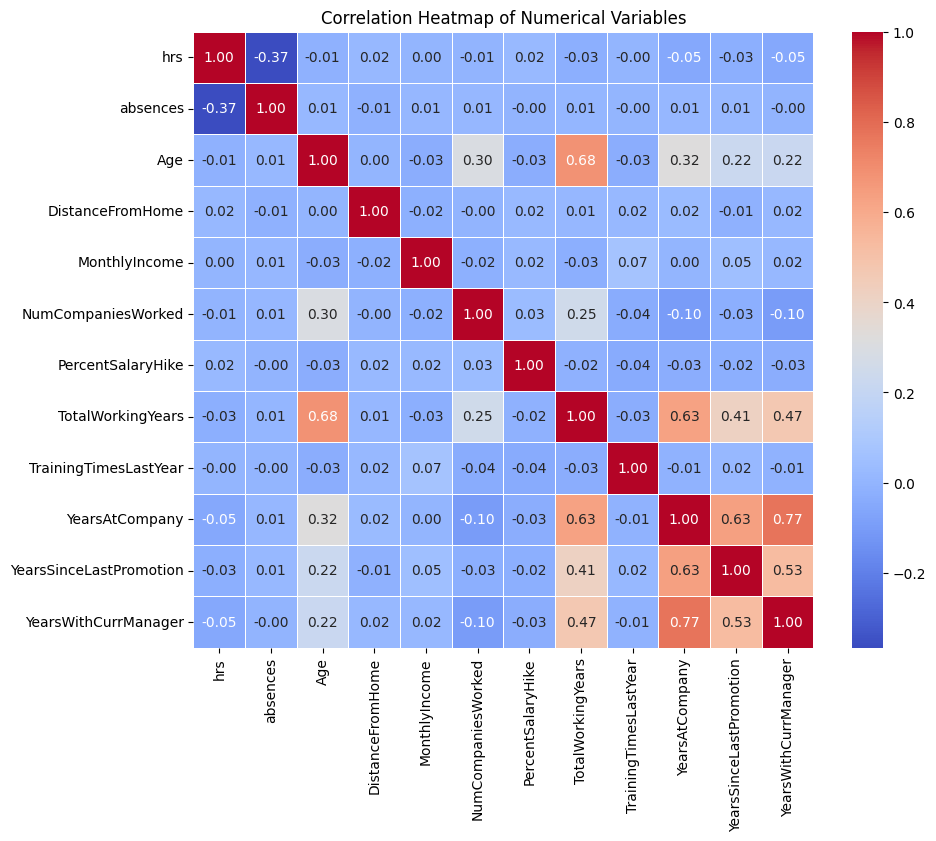

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = avdata[numerical_vars].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [11]:
# # For continuous variables vs Attrition
# for num_col in numerical_vars:
#     plt.figure(figsize=(3, 2))
#     sns.boxplot(x=avdata['Attrition'], y=avdata[num_col], palette="Set3")
#     plt.title(f"Boxplot of {num_col} by Attrition")
#     plt.show()

#     # You can also use violin plots instead of boxplots
#     plt.figure(figsize=(3, 2))
#     sns.violinplot(x=avdata['Attrition'], y=avdata[num_col], palette="Set3")
#     plt.title(f"Violin plot of {num_col} by Attrition")
#     plt.show()

# # For categorical variables vs Attrition
# for cat_col in categorical_vars:
#     plt.figure(figsize=(3, 2))
#     sns.countplot(x=avdata[cat_col], hue=avdata['Attrition'], palette="Set2")
#     plt.title(f"Count plot of {cat_col} by Attrition")
#     plt.xticks(rotation=45)
#     plt.show()


Make these into sensible sentences.

Job involvement
59% 3.0

Performance rating
Either 3 or 4, 84% 3.0

Environment Satisfaction, Job Satisfaction 
Balanced

WorkLifeBalance
60% 3.0

BusinessTravel
71% travels rarely

Department
66% R&D

Education
3 39%, 4 28%

Education Field
Life Sci 40%, medical 32%

JobLevel
1 38%, 2 35.8%


## 1.2. Minor Changes to the Original Dataset
Lastly, we will need to drop constant variables and the ID column.

In [12]:
avdata = avdata.drop(columns = ["EmployeeID", "EmployeeCount", "Over18", "StandardHours"])

Here we are define a general metodology to tranform all variables that willl be use in every model the same:
1. Transform Categorical non ordinal (OneHotEncoding)
2. Transforma Binary
3. Transform the Response
4. Transforma Categorical Ordinal
5. We do not transform the numeircal variables because that has to be done only in the nearest neighbours

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline

X_df = avdata.drop('Attrition', axis=1)
y_df = avdata["Attrition"]

y_df = y_df.map({'No': 0, 'Yes': 1})


# Define ordinal variables and their categories
ordinal_vars = {
    "JobInvolvement": [1.0, 2.0, 3.0, 4.0],
    "PerformanceRating": [3.0, 4.0],
    "EnvironmentSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "JobSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "WorkLifeBalance": [1.0, 2.0, 3.0, 4.0],
    "JobLevel": [1.0, 2.0, 3.0, 4.0, 5.0],
    "Education": [1.0, 2.0, 3.0, 4.0, 5.0],
}

ordinal_columns = list(ordinal_vars.keys())
ordinal_categories = list(ordinal_vars.values())

# Define a compact binary conversion function
def binary_conversion(df):
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    return df

# Create the full preprocessor with binary, categorical, and ordinal encodings
general_preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_vars),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_vars),
        ("ordinal", OrdinalEncoder(categories=ordinal_categories), ordinal_columns),
    ]
)

# Combine everything into a single pipeline
general_pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(binary_conversion, validate=False)),
    ("preprocessor", general_preprocessor)
])

# 2. Setup
## 2.1. Dummy

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.proportion import proportion_confint
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=1/3, random_state=42, stratify=y_df)

# Create the column transformer for numerical and categorical variables
dummy_preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough" , numerical_vars),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_vars),
        ("ordinal", OrdinalEncoder(categories=ordinal_categories), ordinal_columns)
        ]
)

# Create the pipeline
dummy_pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(binary_conversion, validate=False)),
    ("standarization", dummy_preprocessor),
    ("dummy_clf", DummyClassifier(strategy="most_frequent", random_state=42))  # Dummy classifier
])


# Fit the pipeline
dummy_pipeline.fit(X_train, y_train)

# Predict on the test set
dummy_predictions = dummy_pipeline.predict(X_test)

# Evaluate the accuracy
dummy_accuracy = accuracy_score(y_test, dummy_predictions)

# Compute Wilson confidence interval for the accuracy
n_test = len(y_test)  # Number of instances in the test set
successes = int(n_test * dummy_accuracy)  # Number of correct predictions
ci_lower, ci_upper = proportion_confint(successes, n_test, method="wilson")

# Print results
print(f"Only {n_test} instances in the testing partition")
print(f"Dummy Model (Most Frequent Class) Accuracy: {dummy_accuracy:.3f}")
print(f"95% Wilson Confidence Interval for Accuracy: [{ci_lower:.3f}, {ci_upper:.3f}]")


Only 980 instances in the testing partition
Dummy Model (Most Frequent Class) Accuracy: 0.839
95% Wilson Confidence Interval for Accuracy: [0.814, 0.860]


## 2.2. KNN with default hyper-parameters, with standard scaler 

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors


numerical_transformer_stand = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Create the column transformer for numerical and categorical variables
standard_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer_stand, numerical_vars),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_vars),
        ("ordinal", OrdinalEncoder(categories=ordinal_categories), ordinal_columns)
        ]
)


# Create the pipeline
knn_stand_pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(binary_conversion, validate=False)),
    ("standarization", standard_preprocessor),
    ("classifier", neighbors.KNeighborsClassifier())  # KNN model
])

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=1/3, random_state=42, stratify=y_df)

# Train the pipeline
knn_stand_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = knn_stand_pipeline.predict(X_test)

# Compute accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_test_pred)

# Print results
print(f"Accuracy of the KNN model in the pipeline: {accuracy_knn}")

# Compute the Wilson confidence interval for accuracy
n_test = len(y_test)  # Total number of test samples
successes = int(n_test * accuracy_knn)  # Correct predictions
ci_lower, ci_upper = proportion_confint(successes, n_test, method="wilson")

# Print results
print(f"Only {n_test} instances on the testing partition")
print(f"Model accuracy: {accuracy_knn:.5f}")
print(f"95% Wilson Confidence Interval for Accuracy: [{ci_lower:.5f}, {ci_upper:.5f}]")

Accuracy of the KNN model in the pipeline: 0.8510204081632653
Only 980 instances on the testing partition
Model accuracy: 0.85102
95% Wilson Confidence Interval for Accuracy: [0.82736, 0.87194]


## 2.3. KNN with default hyper-parameters, with min-max scaler

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors


#Create the numerical transformer
numerical_transformer_mixmax = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])

# Create the column transformer for numerical and categorical variables
mixmax_preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer_mixmax, numerical_vars),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_vars),
        ("ordinal", OrdinalEncoder(categories=ordinal_categories), ordinal_columns)
        ]
)


# Create the pipeline
knn_minmax_pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(binary_conversion, validate=False)),
    ("standarization", mixmax_preprocessor),
    ("classifier", neighbors.KNeighborsClassifier())  # KNN model
])

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=1/3, random_state=42, stratify=y_df)

# Train the pipeline
knn_minmax_pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = knn_minmax_pipeline.predict(X_test)

# Compute accuracy
accuracy_knn = metrics.accuracy_score(y_test, y_test_pred)

# Print results
print(f"Accuracy of the KNN model in the pipeline: {accuracy_knn}")

# Compute the Wilson confidence interval for accuracy
n_test = len(y_test)  # Total number of test samples
successes = int(n_test * accuracy_knn)  # Correct predictions
ci_lower, ci_upper = proportion_confint(successes, n_test, method="wilson")

# Print results
print(f"Only {n_test} instances on the testing partition")
print(f"Model accuracy: {accuracy_knn:.5f}")
print(f"95% Wilson Confidence Interval for Accuracy: [{ci_lower:.5f}, {ci_upper:.5f}]")

Accuracy of the KNN model in the pipeline: 0.8295918367346938
Only 980 instances on the testing partition
Model accuracy: 0.82959
95% Wilson Confidence Interval for Accuracy: [0.80478, 0.85183]


Here we check if the standar or mixmax works better with fast cv

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold


# Outer evaluation split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=1/3, random_state=42)

# Stratified K-Fold
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Store inner evaluation scores
inner_scores = {}


knn_std_default_scores = cross_val_score(knn_stand_pipeline, X_train, y_train, cv=inner, scoring='accuracy')
inner_scores['KNN Standard Default'] = knn_std_default_scores.mean()
knn_std_default_scores = cross_val_score(knn_minmax_pipeline, X_train, y_train, cv=inner, scoring='accuracy')
inner_scores['KNN MinMax Default'] = knn_std_default_scores.mean()


# Convert to DataFrame
scores_df = pd.DataFrame.from_dict(inner_scores, orient='index', columns=['Score'])

# Display the table
print(scores_df)

                         Score
KNN Standard Default  0.849496
KNN MinMax Default    0.823469


## 2.4. KNN, using the best scaler, with hyper-parameter tuning


In [18]:
# Import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.stats.proportion import proportion_confint
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=1/3, random_state=42, stratify=y_df)


# Define hyperparameter search space for the KNN classifier
param_grid_knn = {
    "classifier__n_neighbors": [5, 10, 15, 20, 25, 30, 35, 40],  # Number of neighbors
    "classifier__weights": ["uniform", "distance"],              # Weight function used in prediction
    "classifier__metric": ["euclidean", "manhattan", "chebyshev"] # Distance metric
}

# Set up GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(
    estimator=knn_stand_pipeline,  # Pipeline containing KNN classifier
    param_grid=param_grid_knn,     # Defined hyperparameter grid
    cv=5,                          # 5-fold cross-validation
    scoring="accuracy",            # Metric for evaluation
    verbose=1                      # Verbosity for logging
)

# Fit the model on training data
grid_search_knn.fit(X_train, y_train)

# Retrieve the best parameters and the best model from GridSearchCV
best_params = grid_search_knn.best_params_      # Best combination of hyperparameters
best_model = grid_search_knn.best_estimator_    # Best pipeline with optimal hyperparameters

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)       # Accuracy score on the test set
n_test = len(y_test)                            # Number of test samples
correct_predictions = int(n_test * accuracy)    # Number of correct predictions

# Calculate a 95% confidence interval for the accuracy
ci_low, ci_high = proportion_confint(correct_predictions, n_test, method="wilson")

# Create a DataFrame with all hyperparameter combinations and their accuracies
results_df = pd.DataFrame(grid_search_knn.cv_results_)
results_df = results_df[[
    'param_classifier__n_neighbors',  # Number of neighbors
    'param_classifier__weights',      # Weight function
    'param_classifier__metric',       # Distance metric
    'mean_test_score'                 # Mean accuracy score from cross-validation
]].sort_values(by='mean_test_score', ascending=False)  # Sort by highest accuracy

# Print the best parameters, test accuracy, and confidence interval
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy:.3f}")
print(f"95% Confidence Interval for Accuracy: [{ci_low:.3f}, {ci_high:.3f}]")
print("\nHyperparameter Combinations and Accuracies:")
print(results_df)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Hyperparameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}
Test Accuracy: 0.938
95% Confidence Interval for Accuracy: [0.921, 0.951]

Hyperparameter Combinations and Accuracies:
    param_classifier__n_neighbors param_classifier__weights  \
19                             10                  distance   
17                              5                  distance   
21                             15                  distance   
23                             20                  distance   
1                               5                  distance   
25                             25                  distance   
3                              10                  distance   
27                             30                  distance   
29                             35                  distance   
31                             40                  distance   
5 

## 2.5. Tree with no Tunning


In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=1/3, random_state=42, stratify=y_df)

# Create the column transformer for numerical and categorical variables
trees_preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough" , numerical_vars),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_vars),
        ("ordinal", OrdinalEncoder(categories=ordinal_categories), ordinal_columns)
        ]
)

# Create the pipeline
trees_pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(binary_conversion, validate=False)),
    ("standarization", trees_preprocessor),
    ("decision_tree", DecisionTreeClassifier(random_state=42))  # Dummy classifier
])



# Train the model
trees_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = trees_pipeline.predict(X_test)

# Evaluate the model
accuracy_trees = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_trees:.2f}")

print(f"Only {len(y_test)} instances on the testing partition")
print(f"Model accuracy: {accuracy_trees} ")
proportion_confint(len(y_test) * accuracy_trees, len(y_test), method="wilson")

# Acceder al modelo dentro del pipeline
decision_tree_model = trees_pipeline.named_steps["decision_tree"]

# Imprimir los parámetros del modelo
print(f"\n\nCriterion: {decision_tree_model.criterion}")  # Criterio de división
print(f"Max Depth: {decision_tree_model.max_depth}")  # Profundidad máxima del árbol
print(f"Min Samples Split: {decision_tree_model.min_samples_split}")  # Mínimo de muestras para dividir un nodo
print(f"Min Samples Leaf: {decision_tree_model.min_samples_leaf}")  # Mínimo de muestras por nodo hoja



Accuracy: 0.89
Only 980 instances on the testing partition
Model accuracy: 0.8857142857142857 


Criterion: gini
Max Depth: None
Min Samples Split: 2
Min Samples Leaf: 1


## 2.6. Trees with HyperParameter tunning



In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from statsmodels.stats.proportion import proportion_confint
import pandas as pd

# Define the parameter grid
param_grid = {
    "decision_tree__max_depth": [5, 10, 15, 20, 25, 30, 35, 40],
    "decision_tree__min_samples_split": [2, 5, 10, 15, 20, 30],
    "decision_tree__min_samples_leaf": [1, 2, 5, 10]
}

# Set up GridSearchCV for the pipeline
grid_search_trees = GridSearchCV(
    estimator=trees_pipeline,  # Use the pipeline
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    verbose=1
)

# Fit GridSearchCV on training data
grid_search_trees.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search_trees.best_params_
best_model = grid_search_trees.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
n_test = len(y_test)
correct_predictions = int(n_test * accuracy)

# Calculate Confidence Interval
ci_low, ci_high = proportion_confint(correct_predictions, n_test, method="wilson")

# Create a DataFrame of all tries and accuracies
results_df = pd.DataFrame(grid_search_trees.cv_results_)
results_df = results_df[[
    'param_decision_tree__max_depth', 
    'param_decision_tree__min_samples_split', 
    'param_decision_tree__min_samples_leaf', 
    'mean_test_score'
]].sort_values(by='mean_test_score', ascending=False)

# Print results
print(f"Best Hyperparameters: {best_params}")
print(f"Test Accuracy: {accuracy:.3f}")
print(f"95% Confidence Interval for Accuracy: [{ci_low:.3f}, {ci_high:.3f}]")
print("\nHyperparameter Combinations and Accuracies:")
print(results_df)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'decision_tree__max_depth': 20, 'decision_tree__min_samples_leaf': 1, 'decision_tree__min_samples_split': 2}
Test Accuracy: 0.886
95% Confidence Interval for Accuracy: [0.864, 0.904]

Hyperparameter Combinations and Accuracies:
     param_decision_tree__max_depth  param_decision_tree__min_samples_split  \
96                               25                                       2   
168                              40                                       2   
72                               20                                       2   
144                              35                                       2   
120                              30                                       2   
..                              ...                                     ...   
135                              30                                      15   
87                               20                   

# 3 CROSS VALIDATION

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold


# Outer evaluation split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=1/3, random_state=42)

# Stratified K-Fold
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Store inner evaluation scores
inner_scores = {}


#Dummy model
dummy_default_scores = cross_val_score(dummy_pipeline, X_train, y_train, cv=inner, scoring='accuracy')
inner_scores['Dummy Model'] = dummy_default_scores.mean()


# Trees with default hyper-parameters
tree_default_scores = cross_val_score(trees_pipeline, X_train, y_train, cv=inner, scoring='accuracy')
inner_scores['Tree Default'] = tree_default_scores.mean()

# Trees with hyperparameter tuning
param_grid_tree = {
    "decision_tree__max_depth": [5, 10, 15, 20, 25],
    "decision_tree__min_samples_split": [2, 5, 10, 15, 20],
    "decision_tree__min_samples_leaf": [1, 2, 5, 10]
}
grid_search_tree = GridSearchCV(trees_pipeline, param_grid_tree, cv=inner, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)
inner_scores['Tree Tuned'] = grid_search_tree.best_score_


knn_std_default_scores = cross_val_score(knn_stand_pipeline, X_train, y_train, cv=inner, scoring='accuracy')
inner_scores['KNN Standard Default'] = knn_std_default_scores.mean()

# KNN with hyperparameter tuning
param_grid_knn = {
    "classifier__n_neighbors": [5, 10, 15, 20, 25, 30, 35, 40],  # Number of neighbors
    "classifier__weights": ["uniform", "distance"],              # Weight function used in prediction
    "classifier__metric": ["euclidean", "manhattan", "chebyshev"] # Distance metric
}

grid_search_knn = GridSearchCV(knn_stand_pipeline, param_grid_knn, cv=inner, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
inner_scores['KNN Standard Tuned'] = grid_search_knn.best_score_


# Convert to DataFrame
scores_df = pd.DataFrame.from_dict(inner_scores, orient='index', columns=['Score'])

# Add ratio with Dummy Model
dummy_score = inner_scores['Dummy Model']
scores_df['Ratio to Dummy'] = scores_df['Score'] / dummy_score

# Display the table
print(scores_df)

                         Score  Ratio to Dummy
Dummy Model           0.838265        1.000000
Tree Default          0.852563        1.017056
Tree Tuned            0.862253        1.028615
KNN Standard Default  0.849496        1.013397
KNN Standard Tuned    0.922450        1.100427


CHOOSEN MODEL:  KNN STANDARD TUNED

# 4. Estimation on the whole test data and estimate performance on the TEST

In [22]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.stats.proportion import proportion_confint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Preprocess test dataset
X_test_df = compt.copy()

# Define ordinal variables and their categories
ordinal_vars = {
    "JobInvolvement": [1.0, 2.0, 3.0, 4.0],
    "PerformanceRating": [3.0, 4.0],
    "EnvironmentSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "JobSatisfaction": [1.0, 2.0, 3.0, 4.0],
    "WorkLifeBalance": [1.0, 2.0, 3.0, 4.0],
    "JobLevel": [1.0, 2.0, 3.0, 4.0, 5.0],
    "Education": [1.0, 2.0, 3.0, 4.0, 5.0],
}

ordinal_columns = list(ordinal_vars.keys())
ordinal_categories = list(ordinal_vars.values())

# Define a compact binary conversion function
def binary_conversion(df):
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    return df

# Create the full preprocessor with binary, categorical, and ordinal encodings
general_preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numerical_vars),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_vars),
        ("ordinal", OrdinalEncoder(categories=ordinal_categories), ordinal_columns),
    ]
)

# Combine everything into a single pipeline
general_pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(binary_conversion, validate=False)),
    ("preprocessor", general_preprocessor)
])

# Fit the pipeline on the training dataset
X_train_preprocessed = general_pipeline.fit_transform(X_df)
X_test_preprocessed = general_pipeline.transform(X_test_df)

# KNN Classifier Pipeline
knn_pipeline = Pipeline(steps=[
    ("classifier", KNeighborsClassifier())
])

# Define hyperparameter search space for the KNN classifier
param_grid_knn = {
    "classifier__n_neighbors": [5, 10, 15, 20, 25, 30, 35, 40],
    "classifier__weights": ["uniform", "distance"],
    "classifier__metric": ["euclidean", "manhattan", "chebyshev"]
}

# Set up GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn,
    cv=5,
    scoring="accuracy",
    verbose=1
)

# Fit the model on training data
grid_search_knn.fit(X_train_preprocessed, y_df)

# Retrieve the best parameters and the best model from GridSearchCV
best_params = grid_search_knn.best_params_
best_model = grid_search_knn.best_estimator_

# Make predictions on the test set
y_pred_test = best_model.predict(X_test_preprocessed)

# Since the true labels for the test set are unavailable, provide output predictions
print(f"Predictions for the test dataset:\n{y_pred_test}")

# Output best parameters and hyperparameter tuning results
results_df = pd.DataFrame(grid_search_knn.cv_results_)
results_df = results_df[[
    'param_classifier__n_neighbors',
    'param_classifier__weights',
    'param_classifier__metric',
    'mean_test_score'
]].sort_values(by='mean_test_score', ascending=False)

print(f"Best Hyperparameters: {best_params}")
print("\nHyperparameter Combinations and Accuracies:")
print(results_df)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Predictions for the test dataset:
[0 0 0 ... 1 1 0]
Best Hyperparameters: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 10, 'classifier__weights': 'distance'}

Hyperparameter Combinations and Accuracies:
    param_classifier__n_neighbors param_classifier__weights  \
19                             10                  distance   
21                             15                  distance   
25                             25                  distance   
27                             30                  distance   
23                             20                  distance   
29                             35                  distance   
17                              5                  distance   
31                             40                  distance   
1                               5                  distance   
9                              25                  distance   
5                       

In [25]:
import joblib

# 1. Make predictions on the test set
y_pred_test = best_model.predict(X_test_preprocessed)
print(f"Predictions for the test dataset:\n{y_pred_test}")

# 2. Train the final model using the entire training dataset
final_model = best_model
final_model.fit(X_train_preprocessed, y_df)

# 3. Make predictions on the competition dataset
# Assume the competition dataset is already loaded into `X_competition_df`
X_test_preprocessed = general_pipeline.transform(X_test_df)
competition_predictions = final_model.predict(X_test_preprocessed)

# Save the competition predictions to a CSV file
competition_predictions_df = pd.DataFrame(competition_predictions, columns=["Predictions"])
competition_predictions_df.to_csv("competition_predictions.csv", index=False)
print("Predictions for the competition dataset have been saved to 'competition_predictions.csv'.")

# 4. Save the final model to a file (ML format)
joblib.dump(final_model, 'final_knn_model.joblib')
print("The final model has been saved as 'final_knn_model.joblib'.")


Predictions for the test dataset:
[0 0 0 ... 1 1 0]
Predictions for the competition dataset have been saved to 'competition_predictions.csv'.
The final model has been saved as 'final_knn_model.joblib'.


# 5. FINAL MODEL (TRAIN WITH WHOLE DATA) AND BUILD PREDICTIONS